# Visualisation and clustering of Road Accident Data of Raipur Year 2019 &  2020

In [1]:
#import required library files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import folium
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the data 
ds = pd.read_csv("Raipur_Accident_Data_Visua.csv")

In [3]:
ds

Police Station  Police_Station Crime No.         Age      Gender  \
0          ABHANPUR               1    571/19     Unknown           M   
1          ABHANPUR               1    362/19          40           M   
2          ABHANPUR               1    396/19          26           M   
3          ABHANPUR               1    488/20          32           M   
4          ABHANPUR               1    Jul-19  Not Known   Not Known    
...             ...             ...       ...         ...         ...   
1601    CIVIL LINES               2     36/21          25           M   
1602      KHAMTARAI               6    677/19          25           M   
1603     TELIBANDHA               9    559/19          45           M   
1604     TELIBANDHA               9     30/19          34           M   
1605     TELIBANDHA               9     35/19          40           M   

      Gender.1 Road Type  Road_Type Place  Incident_Area  ... ACT_279-323  \
0            0         O          2     R              1  ...           0   
1            0        SH          1     R              1  ...           1   
2            0        NH          0     U              0  ...           0   
3            0        NH          0     R              1  ...           0   
4            2         O          2     R              1  ...           0   
...        ...       ...        ...   ...            ...  ...         ...   
1601         0         O          2     U              0  ...           0   
1602         0        SH          1     U              0  ...           0   
1603         0        NH          0     U              0  ...           0   
1604         0         O          2     U              0  ...           1   
1605         0        NH          0     U              0  ...           0   

      Act_279-294-337 ACT_279-304-A  ACT_279-294-506 Incident Date  \
0                   0             1                0      09-08-19   
1                   0             0                0      21-07-19   
2                   1             0                0      06-08-19   
3                   0             1                0      21-12-20   
4                   1             0                0      04-01-19   
...               ...           ...              ...           ...   
1601                1             0                0      12-01-21   
1602                1             0                0      13-12-19   
1603                1             0                0      23-11-19   
1604                0             0                0      17-11-19   
1605                1             0                0      20-01-19   

      Incident Time Incident_Date_Time  \
0             17:00     09-08-19 17:00   
1             17:30     21-07-19 17:30   
2             19:00     06-08-19 19:00   
3             17:15     21-12-20 17:15   
4             18:00     04-01-19 18:00   
...             ...                ...   
1601          23:00     12-01-21 23:00   
1602           7:55      13-12-19 7:55   
1603          22:30     23-11-19 22:30   
1604          22:43     17-11-19 22:43   
1605          18:00     20-01-19 18:00   

                                         Incident Place   Latitude  Longitude  
0                   ग्राम भरेंगाभांठा एवं परसुली के बीच  21.325140  81.639546  
1             अभनपुर राजिम रोड राठी किराना दुकान के पास  21.050567  81.752261  
2          अभनपुर बस स्टैंड यात्री प्रतिक्षालय के सामने  21.048149  81.735910  
3     पी जामगांव रोड नहर पुलिया के पास ग्राम पी जामगांव  21.052639  81.808702  
4                        बड़े भांठा मोड़ अभनपुर सारखी रोड  21.053051  81.742623  
...                                                 ...        ...        ...  
1601                       पंडरी बस स्टैंड केनाल रायपुर  21.248638  81.645870  
1602                            वीनू पेट्रोल पंप खमतराई  21.232439  81.974007  
1603                   GAURAV GARDEN FRONT SERVICE ROAD  21.223051  81.688381  
1604                  NERA NEELAM GARDEN VIP ROAD RAIUR  

In [4]:
#Count value by vehiclewise
ds['Vehicle'].value_counts()

Motorised Two Wheeler               557
Car/Jeep/Van/Taxi                   389
Truck/Trolly                        320
Unknown                             189
Tempo/Tractor                        55
Bus                                  36
Heavy Articulated Vehicle/Trolly     31
Auto Rickshaw                        29
Name: Vehicle, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

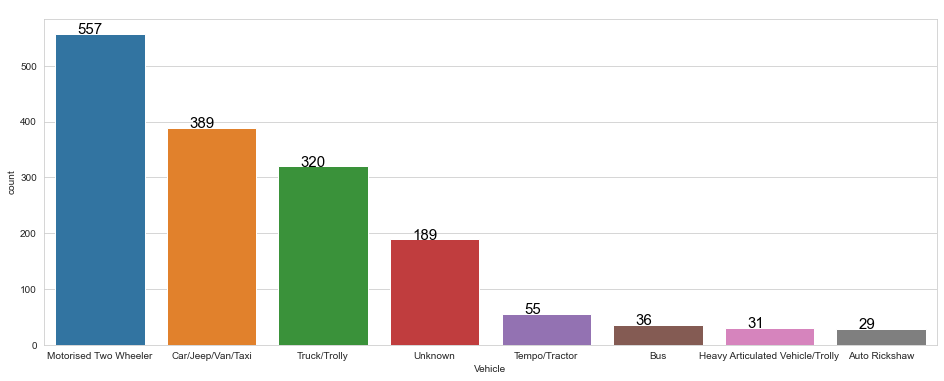

In [5]:
plt.figure(figsize=(16,6))
ax = sns.countplot(x=ds['Vehicle'],data=ds, order = ds['Vehicle'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15)
plt.xticks(rotation = 0)

In [6]:
#Count value by National highway, State highway or Other
ds['Road Type'].value_counts()

O     744
NH    575
SH    287
Name: Road Type, dtype: int64

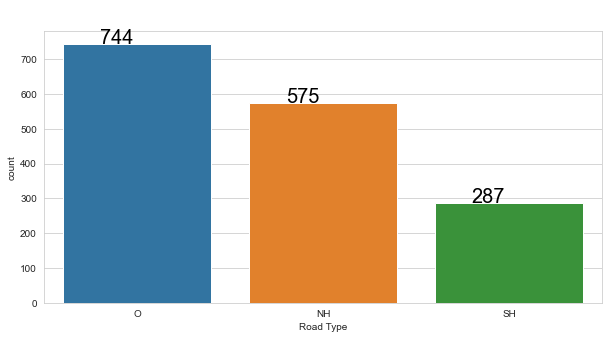

In [7]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x=ds['Road Type'],data=ds, order = ds['Road Type'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=20)

In [8]:
#Count value by Urban or Rural areawise
ds['Place'].value_counts()

R    891
U    715
Name: Place, dtype: int64

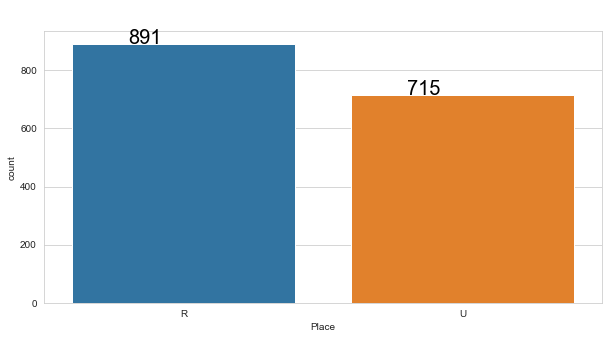

In [9]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x=ds['Place'],data=ds, order = ds['Place'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=20)

In [10]:
#Count value by Police Station wise
ds['Police Station'].value_counts()

DHARSIWA            310
GOBRA NAWAPARA      231
KHARORA             193
TELIBANDHA          190
ABHANPUR            173
KHAMTARAI           153
CIVIL LINES         144
DEEN DAYAL NAGAR    122
KOTWALI              90
Name: Police Station, dtype: int64

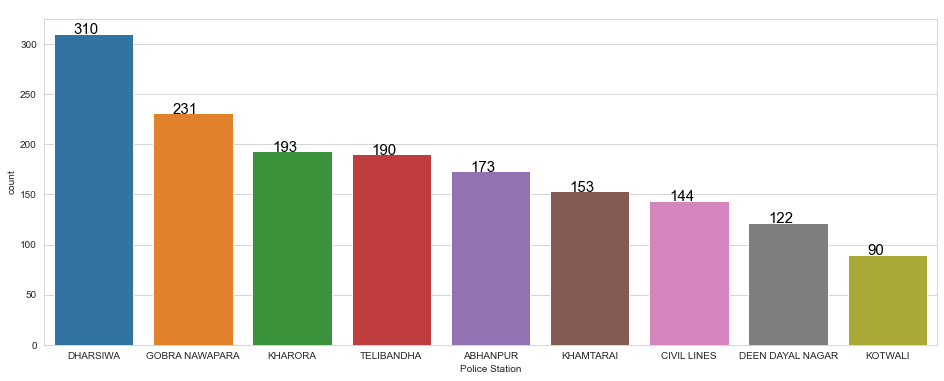

In [11]:
plt.figure(figsize=(16,6))
ax = sns.countplot(x=ds['Police Station'],data=ds, order = ds['Police Station'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15)

In [12]:
#Count Hour, Month & Weeks of Incident_Date_Time 
type(ds['Incident_Date_Time'].iloc[1])
ds['Incident_Date_Time'] = pd.to_datetime(ds['Incident_Date_Time'])
ds['Hour'] = ds['Incident_Date_Time'].apply(lambda time: time.hour)
ds['Month'] = ds['Incident_Date_Time'].apply(lambda time: time.month)
ds['Day_of_Week'] = ds['Incident_Date_Time'].apply(lambda time: time.dayofweek)

In [15]:
ds['Day_of_Week']

0       6
1       6
2       5
3       0
4       0
       ..
1601    2
1602    4
1603    5
1604    6
1605    6
Name: Day_of_Week, Length: 1606, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

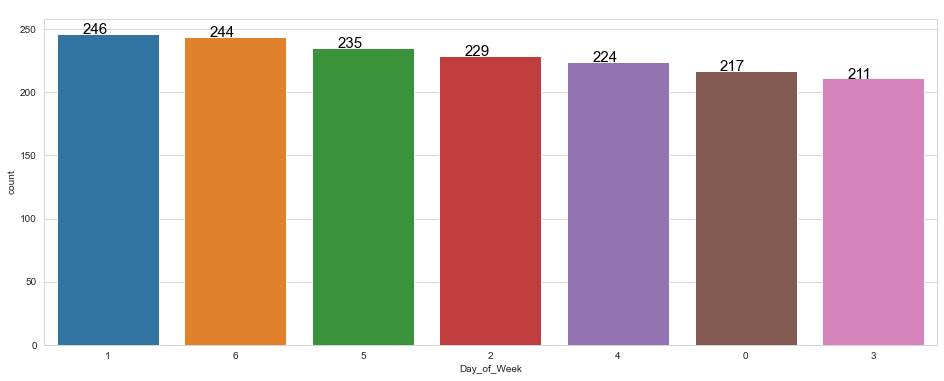

In [13]:
#Count no of accidents in days of week and plot figure
plt.figure(figsize=(16,6))
ax = sns.countplot(x=ds['Day_of_Week'],data=ds, order = ds['Day_of_Week'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15)
plt.xticks(rotation = 0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

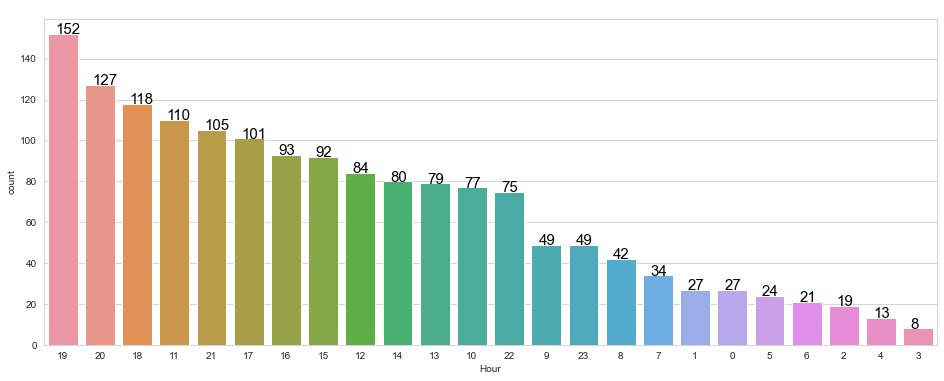

In [14]:
#Count no of accidents in hour and plot figure
plt.figure(figsize=(16,6))
ax = sns.countplot(x=ds['Hour'],data=ds, order = ds['Hour'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15)
plt.xticks(rotation = 0)

In [19]:
#Count monthwise no of accidents
byMonth = ds.groupby('Month').count()
byMonth

Police Station  Police_Station  Crime No.  Age  Gender  Gender.1  \
Month                                                                     
1                 213             213        213  213     213       213   
2                 203             203        203  203     203       203   
3                 133             133        133  133     133       133   
4                 101             101        101  101     101       101   
5                 103             103        103  103     103       103   
6                 143             143        143  143     143       143   
7                 132             132        132  132     132       132   
8                 103             103        103  103     103       103   
9                 113             113        113  113     113       113   
10                124             124        124  124     124       124   
11                132             132        132  132     132       132   
12                106             106        106  106     106       106   

       Road Type  Road_Type  Place  Incident_Area  ...  ACT_279-304-A  \
Month                                              ...                  
1            213        213    213            213  ...            213   
2            203        203    203            203  ...            203   
3            133        133    133            133  ...            133   
4            101        101    101            101  ...            101   
5            103        103    103            103  ...            103   
6            143        143    143            143  ...            143   
7            132        132    132            132  ...            132   
8            103        103    103            103  ...            103   
9            113        113    113            113  ...            113   
10           124        124    124            124  ...            124   
11           132        132    132            132  ...            132   
12           106        106    106            106  ...            106   

       ACT_279-294-506  Incident Date  Incident Time  Incident_Date_Time  \
Month                                                                      
1                  213            213            213                 213   
2                  203            203            203                 203   
3                  133            133            133                 133   
4                  101            101            101                 101   
5                  103            103            103                 103   
6                  143            143            143                 143   
7                  132            132            132                 132   
8                  103            103            103                 103   
9                  113            113            113                 113   
10                 124            124            124                 124   
11                 132            132            132                 132   
12                 106            106            106                 106   

       Incident Place  Latitude  Longitude  Hour  Day_of_Week  
Month                                                          
1                 213       213        213   213          213  
2                 203       203        203   203          203  
3                 133       133        133   133          133  
4                 101       101        101   101          101  
5                 103       103        103   103          103  
6                 143       143        143   143          143  
7                 132       132        132   132          132  
8                 103       103        103   103          103  
9                 113       113        113   113          113  
10                124       124        124   124          124  
11                132       132        132   132          132  
12                106       106     

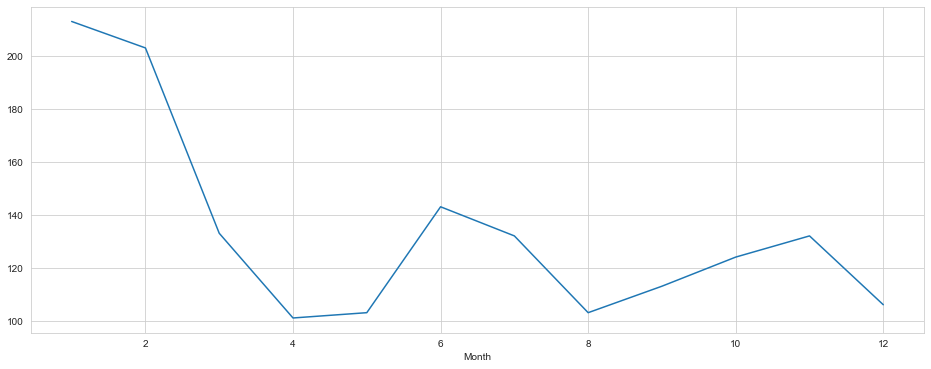

In [20]:
#Plot line graph above data
plt.figure(figsize=(16,6))

byMonth['Police Station'].plot()

In [37]:
type(ds['Incident_Date_Time'].iloc[0])

ds['Incident_Date_Time'] = pd.to_datetime(ds['Incident_Date_Time'])

ds['Hour'] = ds['Incident_Date_Time'].apply(lambda time: time.hour)
ds['Month'] = ds['Incident_Date_Time'].apply(lambda time: time.month)
ds['Day_of_Week'] = ds['Incident_Date_Time'].apply(lambda time: time.dayofweek)

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
ds['Day_of_Week'] = ds['Day_of_Week'].map(dmap)

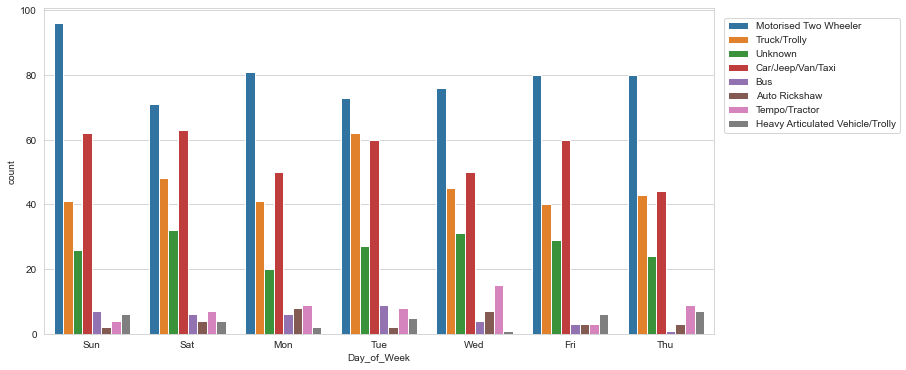

In [42]:
#Vehiclewise no. of accidents by weekday
plt.figure(figsize=(12, 6))

sns.countplot(x='Day_of_Week',data=ds,hue=ds['Vehicle'])

# To relocate the legend
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1)

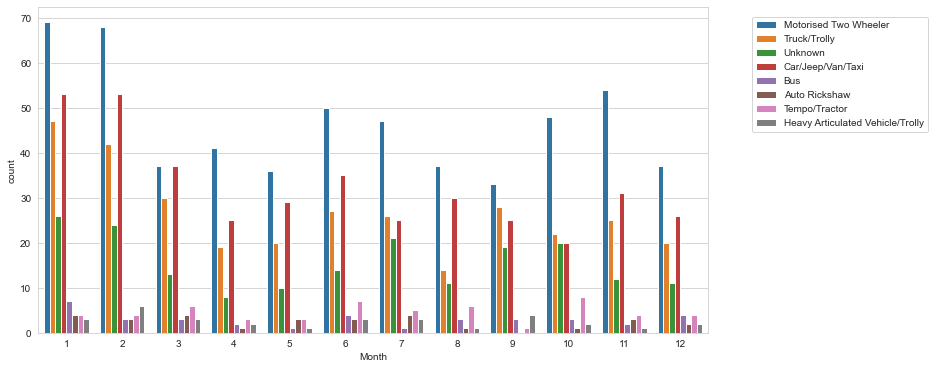

In [43]:
#Vehiclewise nos. of accidents by month

plt.figure(figsize=(12, 6))
sns.countplot(x='Month',data=ds,hue=ds['Vehicle'])

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1)

In [44]:
#Count datewise no. of accidents
ds['Incident_Date_Time'] = pd.to_datetime(ds['Incident_Date_Time'], format = '%d/%m/%Y %H:%M:%S')
ds['Incident_Date_Time']
ds['Date']=ds['Incident_Date_Time'].apply(lambda t: t.date())
byDate = ds.groupby('Date').count()
byDate

Police Station  Police_Station  Crime No.  Age  Gender  Gender.1  \
Date                                                                           
2019-01-01               5               5          5    5       5         5   
2019-01-02               4               4          4    4       4         4   
2019-01-03               2               2          2    2       2         2   
2019-01-04               4               4          4    4       4         4   
2019-01-05               2               2          2    2       2         2   
...                    ...             ...        ...  ...     ...       ...   
2021-10-04               2               2          2    2       2         2   
2021-10-06               4               4          4    4       4         4   
2021-11-03               2               2          2    2       2         2   
2021-11-06               1               1          1    1       1         1   
2021-12-01               3               3          3    3       3         3   

            Road Type  Road_Type  Place  Incident_Area  ...  ACT_279-294-506  \
Date                                                    ...                    
2019-01-01          5          5      5              5  ...                5   
2019-01-02          4          4      4              4  ...                4   
2019-01-03          2          2      2              2  ...                2   
2019-01-04          4          4      4              4  ...                4   
2019-01-05          2          2      2              2  ...                2   
...               ...        ...    ...            ...  ...              ...   
2021-10-04          2          2      2              2  ...                2   
2021-10-06          4          4      4              4  ...                4   
2021-11-03          2          2      2              2  ...                2   
2021-11-06          1          1      1              1  ...                1   
2021-12-01          3          3      3              3  ...                3   

            Incident Date  Incident Time  Incident_Date_Time  Incident Place  \
Date                                                                           
2019-01-01              5              5                   5               5   
2019-01-02              4              4                   4               4   
2019-01-03              2              2                   2               2   
2019-01-04              4              4                   4               4   
2019-01-05              2              2                   2               2   
...                   ...            ...                 ...             ...   
2021-10-04              2              2                   2               2   
2021-10-06              4              4                   4               4   
2021-11-03              2              2                   2               2   
2021-11-06              1              1                   1               1   
2021-12-01              3              3                   3               3   

            Latitude  Longitude  Hour  Month  Day_of_Week  
Date                                                       
2019-01-01         5          5     5      5            5  
2019-01-02         4          4     4      4            4  
2019-01-03         2          2     2      2            2  
2019-01-04         4          4     4      4            4  
2019-01-05         2          2     2      2            2  
...              ...        ...   ...    ...          ...  
2021-10-04         2          2     2      2            2  
2021-10-06         4          4     4      4            4  
2021-11-03         2          2     2      2            2  
2021-11-06         1          1     1      1            1  
2021-12-01         3          3     3      3            3  

[666 rows x 30 columns]

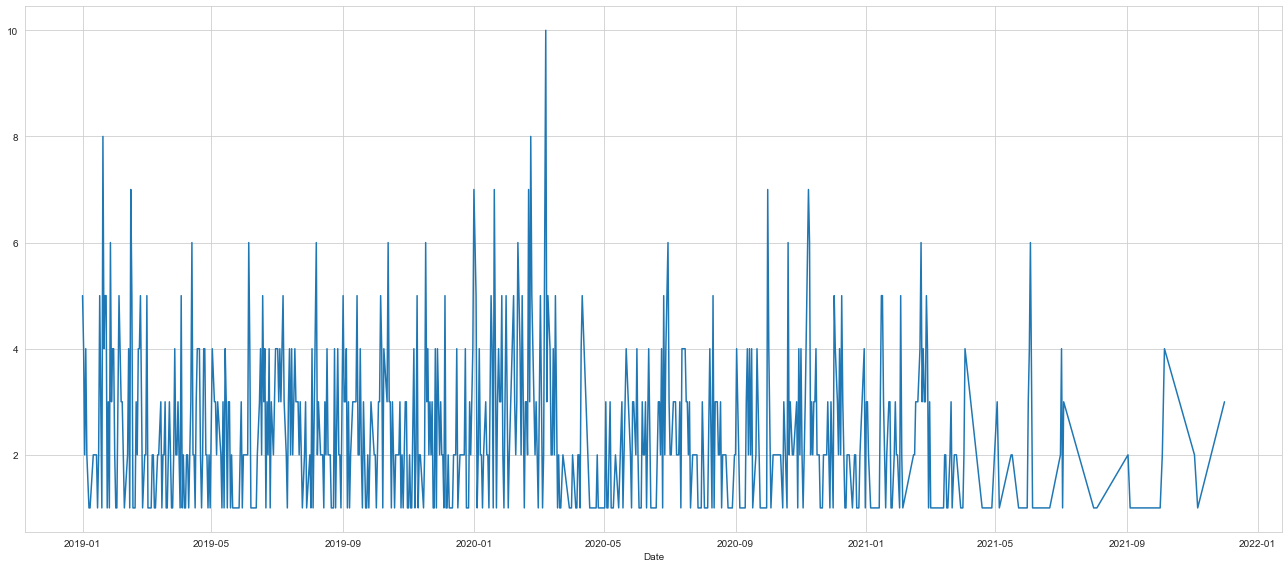

In [45]:
#Plot chart by datewise road accidents
plt.figure(figsize=(18, 8))
ds.groupby('Date').count()['Vehicle'].plot()
plt.tight_layout()

In [47]:
#Count every weekday, hourwise no of accidents
dayHour = ds.groupby(by=['Day_of_Week','Hour']).count()['Vehicle'].unstack()
dayHour

Hour          0    1    2    3    4    5    6    7    8     9   ...    14  \
Day_of_Week                                                     ...         
Fri          5.0  4.0  1.0  2.0  5.0  3.0  2.0  5.0  4.0  13.0  ...   6.0   
Mon          2.0  3.0  2.0  NaN  NaN  2.0  5.0  5.0  8.0   4.0  ...  11.0   
Sat          5.0  5.0  2.0  1.0  2.0  2.0  3.0  6.0  7.0  10.0  ...  13.0   
Sun          6.0  5.0  4.0  NaN  2.0  4.0  NaN  5.0  3.0   7.0  ...  14.0   
Thu          4.0  3.0  3.0  2.0  1.0  4.0  3.0  3.0  7.0   4.0  ...  12.0   
Tue          4.0  4.0  6.0  3.0  3.0  5.0  3.0  5.0  5.0   7.0  ...  15.0   
Wed          1.0  3.0  1.0  NaN  NaN  4.0  5.0  5.0  8.0   4.0  ...   9.0   

Hour           15    16    17    18    19    20    21    22    23  
Day_of_Week                                                        
Fri          12.0  13.0  10.0  15.0  18.0  18.0  13.0  12.0   7.0  
Mon          15.0  10.0   9.0  21.0  25.0  12.0  16.0   4.0  11.0  
Sat          18.0  13.0  18.0  19.0  18.0  14.0  14.0  11.0   5.0  
Sun          16.0  14.0  15.0  17.0  23.0  25.0  20.0  18.0   6.0  
Thu          12.0  13.0  13.0  20.0  22.0  18.0  15.0   7.0   4.0  
Tue          11.0  18.0  17.0  15.0  20.0  22.0  13.0   9.0   5.0  
Wed           8.0  12.0  19.0  11.0  26.0  18.0  14.0  14.0  11.0  

[7 rows x 24 columns]

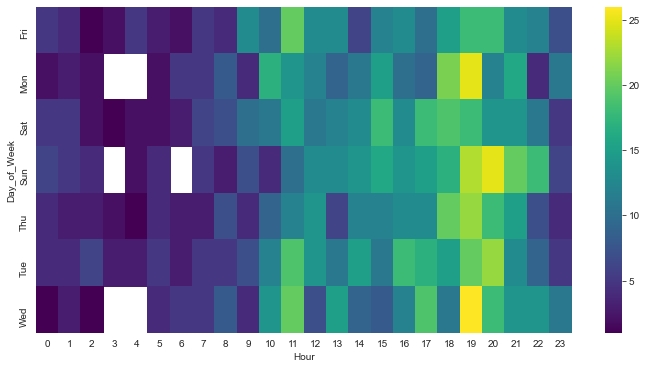

In [49]:
#Heatmap of above output
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

In [50]:
#Count every weekday, monthwise no of accidents
dayMonth = ds.groupby(by=['Day_of_Week','Month']).count()['Vehicle'].unstack()
dayMonth

Month        1   2   3   4   5   6   7   8   9   10  11  12
Day_of_Week                                                
Fri          46  34  17  14  18  15  21   8  15  17  12   7
Mon          29  25  16  11  16  19  23  10  18  12  21  17
Sat          27  35  18  25  10  20  13  26  14  14  20  13
Sun          31  29  27   9  17  22  22  11  16  17  29  14
Thu          20  23  14  15  13  18  23  16  12  23  17  17
Tue          28  33  28  10  19  26  14  18  18  19  17  16
Wed          32  24  13  17  10  23  16  14  20  22  16  22

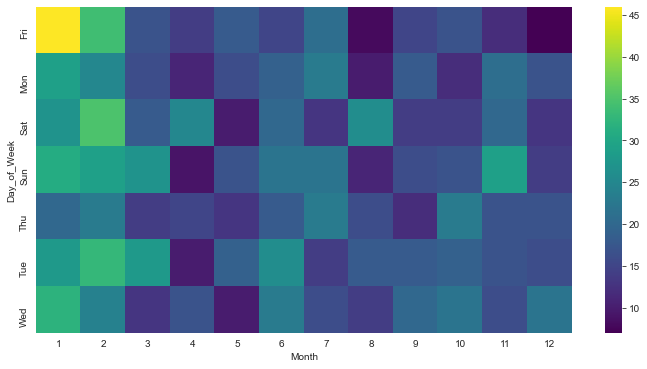

In [51]:
#Draw heatmap of above output
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

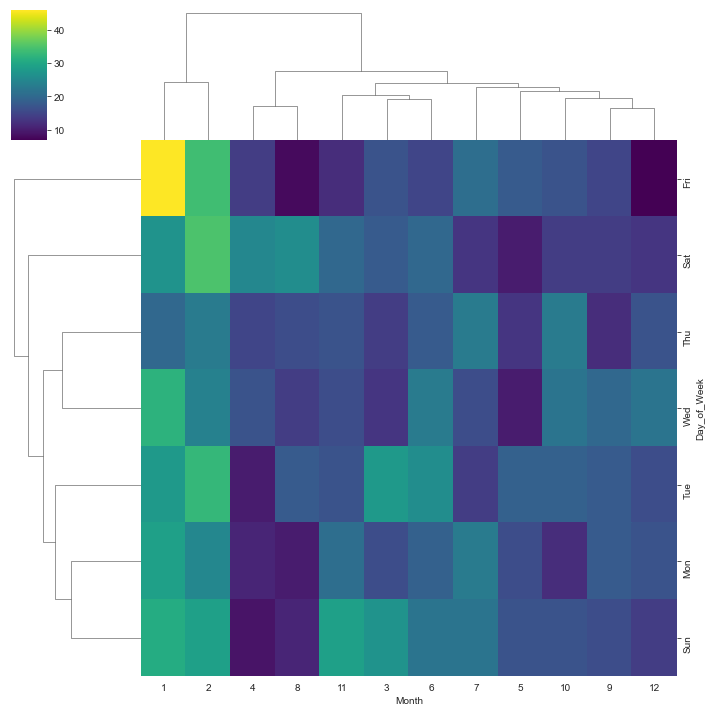

In [53]:
#Cluster map of Weekday and Monthwise
sns.clustermap(dayMonth,cmap='viridis')

# Cluster

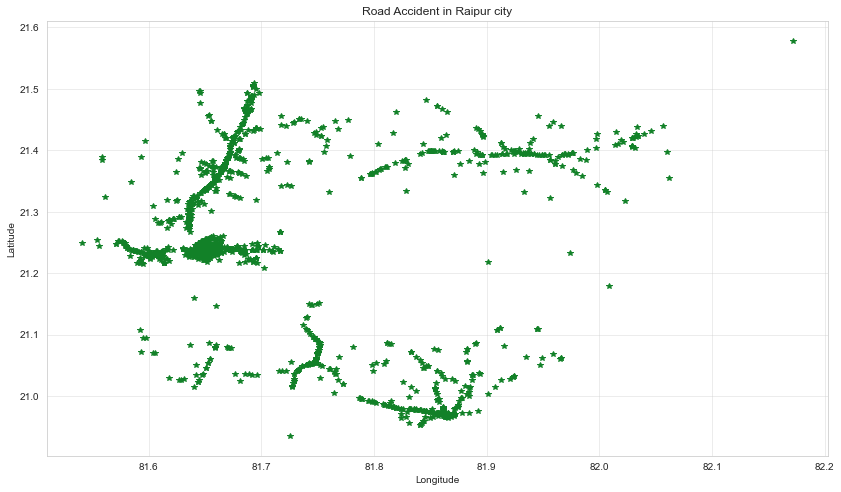

In [4]:
#Crime data according to Latitude and Longitude
plt.figure(figsize=(14,8))
plt.plot(ds['Longitude'], ds['Latitude'],
             marker='*', linewidth=0, color='#128128')
plt.grid(which='major', color='#cccccc', alpha=0.45)
plt.title('Road Accident in Raipur city', family='Arial', fontsize=12)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [5]:
dbscan_data = ds[['Longitude', 'Latitude']]
dbscan_data = dbscan_data.values.astype('float32', copy=False)
dbscan_data

array([[81.63955 , 21.32514 ],
       [81.75226 , 21.050568],
       [81.73591 , 21.04815 ],
       ...,
       [81.68838 , 21.223051],
       [81.689735, 21.221146],
       [81.67191 , 21.238594]], dtype=float32)

In [6]:
dbscan_data_scaler = StandardScaler().fit(dbscan_data)
dbscan_data = dbscan_data_scaler.transform(dbscan_data)
dbscan_data

array([[-0.76666385,  0.57104236],
       [ 0.254068  , -1.3079445 ],
       [ 0.10599867, -1.3244952 ],
       ...,
       [-0.32445955, -0.12758492],
       [-0.31216076, -0.14062446],
       [-0.4735653 , -0.0212193 ]], dtype=float32)

In [7]:
model = DBSCAN(eps = 0.25, min_samples = 6, metric='euclidean').\
fit(dbscan_data)
model

DBSCAN(eps=0.25, min_samples=6)

In [8]:
outliers_df = ds[model.labels_ == -1]
clusters_df = ds[model.labels_ != -1]

In [9]:
colors = model.labels_
colors_clusters = colors[colors != -1]
color_outliers = 'black'

clusters = Counter(model.labels_)
print(clusters)
print(ds[model.labels_ == -1].head())
print('Number of clusters = {}'.format(len(clusters)-1))

Counter({0: 998, 1: 393, 2: 180, -1: 29, 3: 6})
     Police Station  Police_Station Crime No. Age Gender  Gender.1 Road Type  \
52          KHARORA               7    280/20  42      M         0        SH   
55          KHARORA               7    121/21  45      M         0        SH   
227  GOBRA NAWAPARA               5     85/20  25      M         0         O   
242  GOBRA NAWAPARA               5     57/20  29      M         0         O   
248  GOBRA NAWAPARA               5    267/20  25      M         0         O   

     Road_Type Place  Incident_Area  ... ACT_279-323  Act_279-294-337  \
52           1     R              1  ...           0                0   
55           1     R              1  ...           0                0   
227          2     R              1  ...           0                1   
242          2     R              1  ...           0                0   
248          2     R              1  ...           0                1   

    ACT_279-304-A  ACT_279-294-5

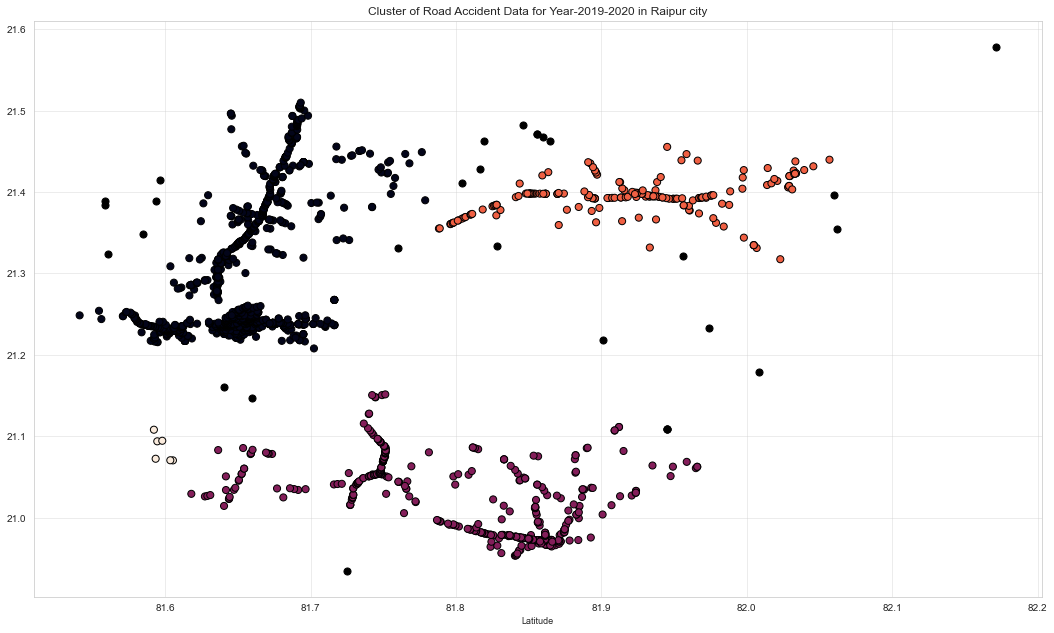

In [10]:
fig = plt.figure(figsize=(14,8))

ax = fig.add_axes([.1, .1, 1,1])

ax.scatter(clusters_df['Longitude'], clusters_df['Latitude'],
           c = colors_clusters, edgecolors='black', s=50)
ax.scatter(outliers_df['Longitude'], outliers_df['Latitude'],
           c = color_outliers, edgecolors='black', s=50)

ax.set_xlabel('Longitude', family='Arial', fontsize=9)
ax.set_xlabel('Latitude', family='Arial', fontsize=9)

plt.title('Cluster of Road Accident Data for Year-2019-2020 in Raipur city', Family='Arial', fontsize=12)

plt.grid(which='major', color='#cccccc', alpha=0.45)

plt.show()

In [11]:
#Show locationwise accidents in Map
locations = ds[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()

map = folium.Map(location=[21.29, 81.6], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=ds['Latitude'][point]).add_to(map)
map

In [18]:
#Show Police Station wise accidents in Map
map = folium.Map(location=[21.29, 81.6], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=ds['Police Station'][point]).add_to(map)
map

In [13]:
#Count locationwise accidents and give the color and size according to the no of accidents 
location=ds.groupby(['Latitude','Longitude','Police_Station','Road_Type']).size().reset_index(name='count').sort_values(by='count',ascending=False)
location=location[location['count']>0]
location['color']=location['count'].apply(lambda count:"Black" if count>=11 else
                                         "blue" if count>=9 and count<11 else
                                         "Orange" if count>=7 and count<9 else
                                         "red" if count>=5 and count<7 else
                                         "navyblue" if count>=3 and count<5 else
                                         "green" if count>=1 and count<3 else
                                         "grey")
location['size']=location['count'].apply(lambda count:12 if count>=11 else
                                         10 if count>=9 and count<11 else
                                         8 if count>=7 and count<9 else
                                         6 if count>=5 and count<7 else
                                         4 if count>=3 and count<5 else
                                         2 if count>=1 and count<3 else
                                         1)
location

Latitude  Longitude  Police_Station  Road_Type  count   color  size
933   21.304821  81.636473               6          2     13   Black    12
669   21.238622  81.671455               9          0     12   Black    12
702   21.239277  81.674033               9          0      7  Orange     8
396   21.217220  81.613670               9          1      6     red     6
900   21.288320  81.636330               6          0      6     red     6
...         ...        ...             ...        ...    ...     ...   ...
498   21.230702  81.609828               3          2      1   green     2
497   21.230677  81.656739               2          2      1   green     2
496   21.230673  81.641675               8          2      1   green     2
495   21.230537  81.600911               3          2      1   green     2
1480  21.578364  82.171362               7          2      1   green     2

[1481 rows x 7 columns]

In [14]:
#Show the density of accidents
m=folium.Map([21.29, 81.6],zoom_start=11)
#location=location[0:2000]
for lat,lon,area,loc,color,count,size in zip(location['Latitude'],location['Longitude'],location['Police_Station'],location['Road_Type'],location['color'],location['count'],location['size']):
    text = """Police Station:{}<br>
              Latitide:{}<br>
              Longitude:{}<br>
              Location:{}<br>
              No. of incidents: {} <br>"""
    text = text.format(area,lat,lon,loc, count)
    folium.CircleMarker([lat, lon],
                  popup=text,
                  radius=size,
                  color='b',
                  fill=True,
                  fill_opacity=0.7,
                  fill_color=color,
                  ).add_to(m)
m

# Logistic_Regression for Raipur Road Accidents 2019-2020

In [15]:
ds['Incident_Date_Time'] = pd.to_datetime(ds['Incident_Date_Time'])

#Set datetime format
ds['Incident_Date_Time'] = pd.to_datetime(ds['Incident_Date_Time'], format = '%d/%m/%Y %H:%M:%S')
ds['Incident_Date_Time']

0      2019-09-08 17:00:00
1      2019-07-21 17:30:00
2      2019-06-08 19:00:00
3      2020-12-21 17:15:00
4      2019-04-01 18:00:00
               ...        
1601   2021-12-01 23:00:00
1602   2019-12-13 07:55:00
1603   2019-11-23 22:30:00
1604   2019-11-17 22:43:00
1605   2019-01-20 18:00:00
Name: Incident_Date_Time, Length: 1606, dtype: datetime64[ns]

In [16]:
#Convert data into feature columns
column_1 = ds.iloc[:,23]

db=pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              "hour": column_1.dt.hour,
              "dayofyear": column_1.dt.dayofyear,
              "week": column_1.dt.week,
              "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter,
             })

In [17]:
dataset=ds.drop('Incident_Date_Time',axis=1)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
ds1=pd.concat([db,dataset],axis=1)

ds1

year  month  day  hour  dayofyear  week  weekofyear  dayofweek  weekday  \
0     2019      9    8    17        251    36          36          6        6   
1     2019      7   21    17        202    29          29          6        6   
2     2019      6    8    19        159    23          23          5        5   
3     2020     12   21    17        356    52          52          0        0   
4     2019      4    1    18         91    14          14          0        0   
5     2020      2   15    18         46     7           7          5        5   
6     2019      6   24    23        175    26          26          0        0   
7     2019      1   15    12         15     3           3          1        1   
8     2019      8   18    22        230    33          33          6        6   
9     2021     10    6    21        279    40          40          2        2   
10    2021      3    1    21         60     9           9          0        0   
11    2019      1   25    21         25     4           4          4        4   
12    2021      5   31    15        151    22          22          0        0   
13    2019      2   25    15         56     9           9          0        0   
14    2021      6    3    14        154    22          22          3        3   
15    2019      4   13    14        103    15          15          5        5   
16    2019     11   17    19        321    46          46          6        6   
17    2021      5    5     8        125    18          18          2        2   
18    2019      2    4    12         35     6           6          0        0   
19    2019      9    2    11        245    36          36          0        0   
20    2019      6    1    13        152    22          22          5        5   
21    2019      9    2    18        245    36          36          0        0   
22    2020      2   18     1         49     8           8          1        1   
23    2020      2   26    19         57     9           9          2        2   
24    2020     12    6    16        341    49          49          6        6   
25    2020      6   27    15        179    26          26          5        5   
26    2020      4    8    13         99    15          15          2        2   
27    2020     11   11    18        316    46          46          2        2   
28    2021     12    1    19        335    48          48          2        2   
29    2021      1   22    18         22     3           3          4        4   
30    2021      3   13    15         72    10          10          5        5   
31    2019      2   15    22         46     7           7          4        4   
32    2020      5   29    18        150    22          22          4        4   
33    2020     10   25    18        299    43          43          6        6   
34    2019      1   20    20         20     3           3          6        6   
35    2019      7    4     5        185    27          27          3        3   
36    2020      6    6     8        158    23          23          5        5   
37    2020      9   16    17        260    38          38          2        2   
38    2021     11    3     7        307    44          44          2        2   
39    2021      3   24    22         83    12          12          2        2   
40    2021      5   16     9        136    19          19          6        6   
41    2019      1   31     7         31     5           5          3        3   
42    2019      2   26    18         57     9           9          1        1   
43    2019      9   20    15        263    38          38          4        4   
44    2019     12   22     7        356    51          51          6        6   
45    2020      2   25     6         56     9           9          1        1   
46    2020      9    5     9        249    36          36          5        5   
47    2020      5   22    16        143    21          21          4        4   
48    2020      6   20     8        1

In [75]:
#Extracting only the independent variable
X=ds1.iloc[:,[1,3,4,5,34,35]].values

In [76]:
X

array([[  9.      ,  17.      , 251.      ,  36.      ,  21.32514 ,
         81.639546],
       [  7.      ,  17.      , 202.      ,  29.      ,  21.050567,
         81.752261],
       [  6.      ,  19.      , 159.      ,  23.      ,  21.048149,
         81.73591 ],
       ...,
       [ 11.      ,  22.      , 327.      ,  47.      ,  21.223051,
         81.688381],
       [ 11.      ,  22.      , 321.      ,  46.      ,  21.221146,
         81.689735],
       [  1.      ,  18.      ,  20.      ,   3.      ,  21.238594,
         81.671913]])

In [79]:
#ACT_279-304-A
y=ds1.iloc[:,[29]].values

In [80]:
y

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [81]:
ds.corr()

Police_Station  Gender.1  Road_Type  Incident_Area  \
Police_Station                1.000000 -0.145291   0.053526      -0.171674   
Gender.1                     -0.145291  1.000000  -0.065653      -0.075574   
Road_Type                     0.053526 -0.065653   1.000000      -0.137464   
Incident_Area                -0.171674 -0.075574  -0.137464       1.000000   
Vehicle_Type                 -0.042861  0.190825  -0.104367       0.128678   
Alcohal_Status                0.072582  0.153263   0.015403       0.050295   
Traffic_Violation_Type        0.104197  0.068831  -0.101481      -0.090938   
ACT_279-323                   0.092558 -0.028543  -0.052833      -0.274188   
Act_279-294-337              -0.070670 -0.023981   0.111221       0.038406   
ACT_279-304-A                -0.000490  0.060957  -0.084466       0.254803   
ACT_279-294-506              -0.066047 -0.006888   0.028291      -0.050235   
Latitude                      0.248858 -0.028022  -0.109770       0.017747   
Longitude                     0.176565 -0.146211   0.072339       0.587941   
Hour                         -0.039079 -0.013524   0.020688       0.043789   
Month                         0.009044  0.008894   0.002833       0.021218   

                        Vehicle_Type  Alcohal_Status  Traffic_Violation_Type  \
Police_Station             -0.042861        0.072582                0.104197   
Gender.1                    0.190825        0.153263                0.068831   
Road_Type                  -0.104367        0.015403               -0.101481   
Incident_Area               0.128678        0.050295               -0.090938   
Vehicle_Type                1.000000        0.022836                0.239134   
Alcohal_Status              0.022836        1.000000                0.065673   
Traffic_Violation_Type      0.239134        0.065673                1.000000   
ACT_279-323                 0.004092       -0.063299                0.088937   
Act_279-294-337            -0.107793        0.031863               -0.099850   
ACT_279-304-A               0.136498        0.037920                0.029875   
ACT_279-294-506            -0.051429       -0.050794               -0.016186   
Latitude                    0.073622       -0.044563                0.312524   
Longitude                   0.005014        0.116085               -0.303619   
Hour                       -0.021804       -0.062119               -0.026070   
Month                       0.020921        0.045586                0.049455   

                        ACT_279-323  Act_279-294-337  ACT_279-304-A  \
Police_Station             0.092558        -0.070670      -0.000490   
Gender.1                  -0.028543        -0.023981       0.060957   
Road_Type                 -0.052833         0.111221      -0.084466   
Incident_Area             -0.274188         0.038406       0.254803   
Vehicle_Type               0.004092        -0.107793       0.136498   
Alcohal_Status            -0.063299         0.031863       0.037920   
Traffic_Violation_Type     0.088937        -0.099850       0.029875   
ACT_279-323                1.000000        -0.617445      -0.305553   
Act_279-294-337           -0.617445         1.000000      -0.546753   
ACT_279-304-A             -0.305553        -0.546753       1.000000   
ACT_279-294-506           -0.044098        -0.078908      -0.039049   
Latitude                   0.039618        -0.156176       0.153857   
Longitude                 -0.241071         0.081683       0.162388   
Hour                      -0.018334        -0.011901       0.035867   
Month                     -0.032096         0.011671       0.021424   

                        ACT_279-294-506  Latitude  Longitude      Hour  \
Police_Station                -0.066047  0.248858   0.176565 -0.039079   
Gender.1                      -0.006888 -0.028022  -0.146211 -0.013524   
Road_Type                      0.028291 -0.109770   0.072339  0.020688   
Incident_Area                 -0.050235  0.017747   0.587941 

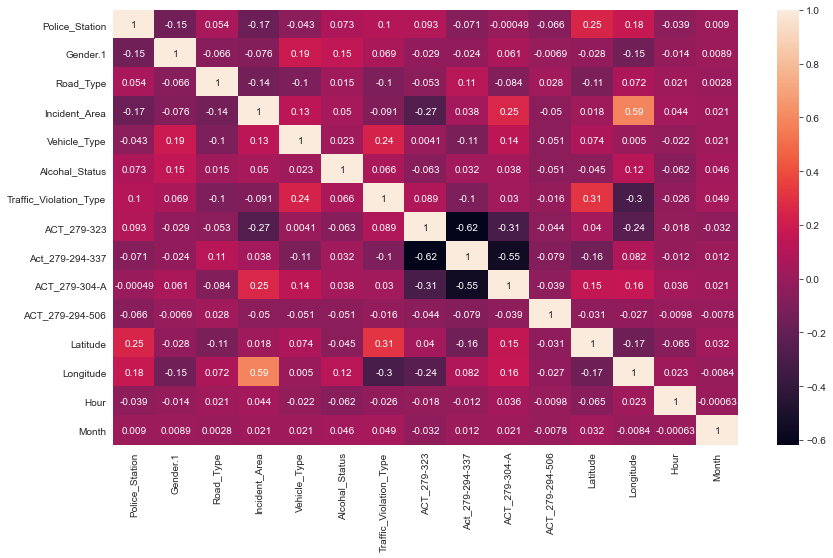

In [82]:
#Visualising the dataset by drawing the correlation map using numerical features
fig = plt.figure(figsize=(14,8))
sns.heatmap(ds.corr(), annot=True)

In [83]:
#Splitting the datase into Training and Test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [84]:
X_train

array([[  9.      ,  14.      , 253.      ,  37.      ,  21.36426 ,
         81.624626],
       [ 11.      ,  16.      , 321.      ,  46.      ,  21.405463,
         81.672005],
       [  5.      ,   0.      , 128.      ,  19.      ,  21.357707,
         81.984145],
       ...,
       [  8.      ,  18.      , 224.      ,  33.      ,  21.372357,
         81.666728],
       [  8.      ,  11.      , 215.      ,  31.      ,  21.229605,
         81.605794],
       [  8.      ,  18.      , 215.      ,  31.      ,  21.236911,
         81.685999]])

In [85]:
len(X_train)

1124

In [86]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

In [91]:
#apply logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [94]:
model.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [95]:
X_test

array([[ 0.31136517, -0.13747802,  0.33719605,  0.31229063,  0.43972424,
        -0.80045702],
       [ 1.42151411, -1.21306013,  1.34407716,  1.33157096,  1.37892877,
        -0.38173725],
       [-1.076321  ,  1.47589514, -1.01751672, -1.02551481, -1.90253598,
         1.06203963],
       ...,
       [-0.2437093 ,  0.22104935, -0.21201183, -0.19734954,  0.03289567,
        -0.74099859],
       [ 0.58890241,  0.7588404 ,  0.62095345,  0.63081573,  0.9030193 ,
        -0.59194307],
       [ 1.14397688, -0.13747802,  1.20677519,  1.20416092,  1.0713065 ,
         1.22629498]])

In [96]:
#predict the model
y_pred= model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [97]:
#Predict the probability
model.predict_proba(X_test)

array([[0.80929464, 0.19070536],
       [0.73596722, 0.26403278],
       [0.8284424 , 0.1715576 ],
       [0.74798976, 0.25201024],
       [0.76368397, 0.23631603],
       [0.67700093, 0.32299907],
       [0.82016768, 0.17983232],
       [0.80755299, 0.19244701],
       [0.84574586, 0.15425414],
       [0.76221737, 0.23778263],
       [0.87854094, 0.12145906],
       [0.8029636 , 0.1970364 ],
       [0.85618432, 0.14381568],
       [0.75956135, 0.24043865],
       [0.85523121, 0.14476879],
       [0.74910706, 0.25089294],
       [0.84237299, 0.15762701],
       [0.85855292, 0.14144708],
       [0.79147472, 0.20852528],
       [0.86884837, 0.13115163],
       [0.84497589, 0.15502411],
       [0.85506474, 0.14493526],
       [0.82293082, 0.17706918],
       [0.79555378, 0.20444622],
       [0.78817696, 0.21182304],
       [0.71890452, 0.28109548],
       [0.72509095, 0.27490905],
       [0.84622693, 0.15377307],
       [0.86283251, 0.13716749],
       [0.83592332, 0.16407668],
       [0.

In [98]:
#Check the score/accuracy of testing_training data

B=model.score(X_test,y_test)
B = B*100
print('Accuracy of Testing data: %.3f' %B)

C=model.score(X_train,y_train)
C = C*100
print('Accuracy of Training data: %.3f' %C)

Accuracy of Testing data: 80.083
Accuracy of Training data: 77.847


In [100]:
#Create confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[380   5]
 [ 91   6]]


In [101]:
#Create classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       385
           1       0.55      0.06      0.11        97

    accuracy                           0.80       482
   macro avg       0.68      0.52      0.50       482
weighted avg       0.75      0.80      0.73       482



# Decision_Tree for Raipur Road Accident 2019-2020

In [103]:
dtree = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [104]:
#Predict the data
y_pred=dtree.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [105]:
#Check accuarcy
dtree.score(X_test,y_test)

0.7987551867219918

In [106]:
#Create confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[380   5]
 [ 92   5]]


In [107]:
#Evaluation of the model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       385
           1       0.50      0.05      0.09        97

    accuracy                           0.80       482
   macro avg       0.65      0.52      0.49       482
weighted avg       0.74      0.80      0.73       482



# Plot Decision Tree

In [115]:
#Put latitude into X1
X1 = ds.iloc[:,[26]].values

#Put ACT_279-304-A into y1
y1 = ds.iloc[:,[19]].values

In [121]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(max_leaf_nodes=20,random_state=0)
model = clf.fit(X1, y1)

In [122]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 81.89
|   |--- feature_0 <= 81.67
|   |   |--- feature_0 <= 81.56
|   |   |   |--- class: 1
|   |   |--- feature_0 >  81.56
|   |   |   |--- class: 0
|   |--- feature_0 >  81.67
|   |   |--- feature_0 <= 81.67
|   |   |   |--- class: 1
|   |   |--- feature_0 >  81.67
|   |   |   |--- feature_0 <= 81.83
|   |   |   |   |--- feature_0 <= 81.75
|   |   |   |   |   |--- feature_0 <= 81.75
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  81.75
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  81.75
|   |   |   |   |   |--- feature_0 <= 81.76
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  81.76
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  81.83
|   |   |   |   |--- class: 0
|--- feature_0 >  81.89
|   |--- feature_0 <= 82.03
|   |   |--- feature_0 <= 81.98
|   |   |   |--- feature_0 <= 81.96
|   |   |   |   |--- feature_0 <= 81.96
|   |   |   |   |   |--- feature_0 <= 81.89


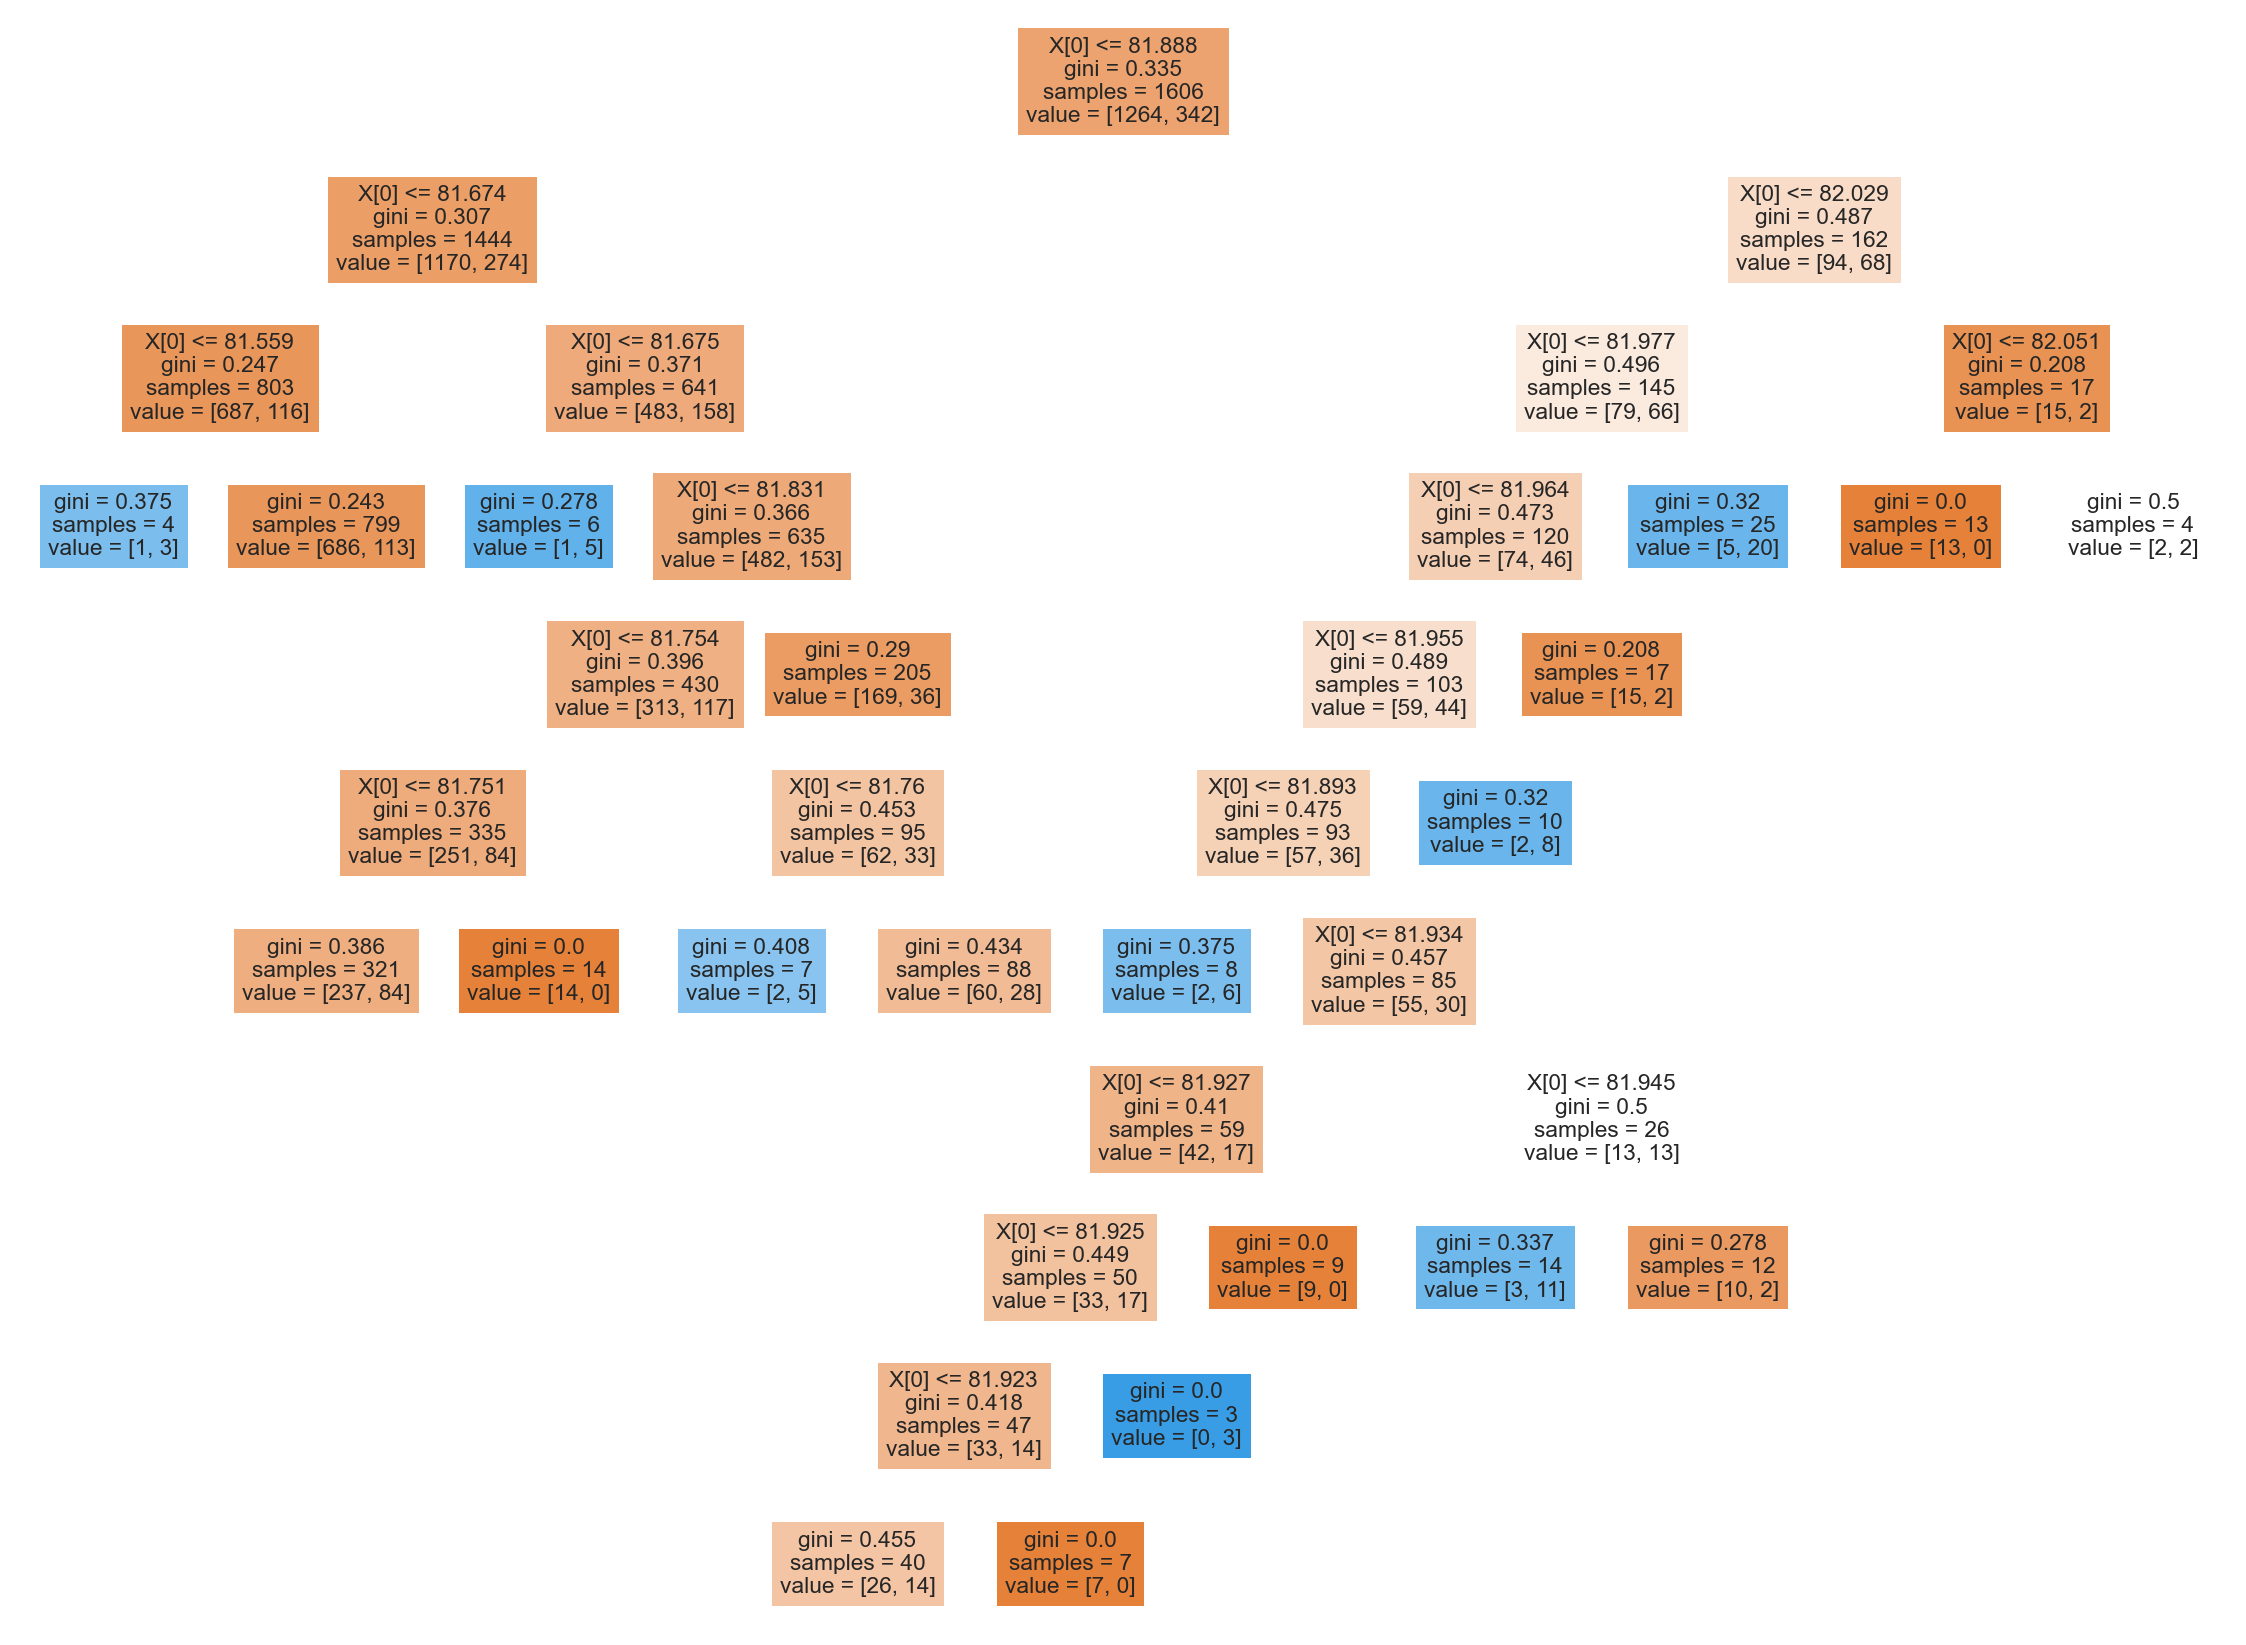

In [130]:
#Longitude value with ACT_279-304-A
fig = plt.figure(figsize=(40,30))
_ = tree.plot_tree(clf, 
                  filled=True)

# Time Series Forecasting

In [61]:
df = pd.read_csv('Raipur_Monthwise_Accidents.csv', parse_dates=['Month'], index_col='Month')

In [62]:
df

Accidents
Month                
2019-01-01         91
2019-02-01         71
2019-03-01         58
2019-04-01         73
2019-05-01         62
2019-06-01         70
2019-07-01         68
2019-08-01         56
2019-09-01         53
2019-10-01         48
2019-11-01         52
2019-12-01         57
2020-01-01         93
2020-02-01         83
2020-03-01         54
2020-04-01          9
2020-05-01         37
2020-06-01         52
2020-07-01         52
2020-08-01         60
2020-09-01         51
2020-10-01         57
2020-11-01         65
2020-12-01         41
2021-01-01         51
2021-02-01         68
2021-03-01         41

In [63]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(df['Accidents'], order = (1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
E:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [64]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1]+DateOffset(months=x) for x in range(0,24)]

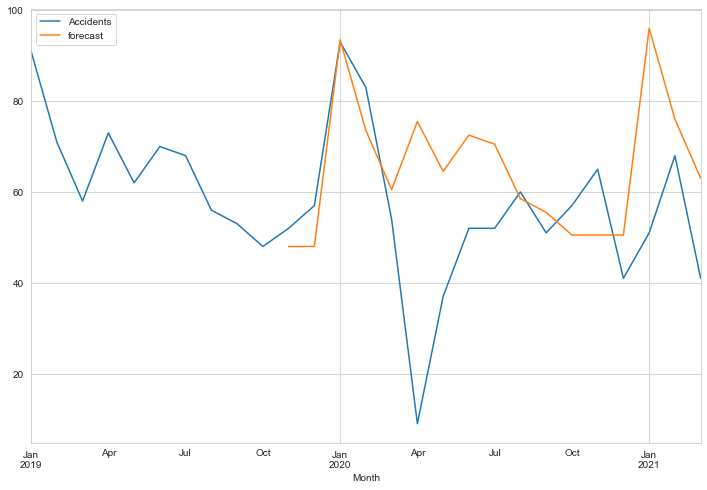

In [65]:
#Orange line are Forecast value respect of original value
df['forecast']=results.predict(start=10,end=100,dynamic=True)
df[['Accidents','forecast']].plot(figsize=(12,8))

In [66]:
future_dates_ds = pd.DataFrame(index= future_dates[1:], columns=df.columns)

In [67]:
future_dates_ds.tail()

Accidents forecast
2022-10-01       NaN      NaN
2022-11-01       NaN      NaN
2022-12-01       NaN      NaN
2023-01-01       NaN      NaN
2023-02-01       NaN      NaN

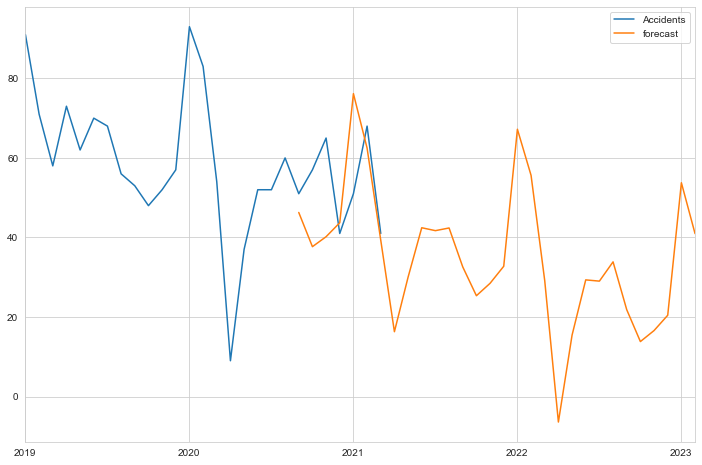

In [68]:
future_Dataset = pd.concat([df, future_dates_ds])
future_Dataset['forecast'] = results.predict(start = 20, end = 120, dynamic = True)
future_Dataset[['Accidents', 'forecast']].plot(figsize=(12,8))

In [69]:
future_Dataset

Accidents   forecast
2019-01-01        91        NaN
2019-02-01        71        NaN
2019-03-01        58        NaN
2019-04-01        73        NaN
2019-05-01        62        NaN
2019-06-01        70        NaN
2019-07-01        68        NaN
2019-08-01        56        NaN
2019-09-01        53        NaN
2019-10-01        48        NaN
2019-11-01        52        NaN
2019-12-01        57        NaN
2020-01-01        93        NaN
2020-02-01        83        NaN
2020-03-01        54        NaN
2020-04-01         9        NaN
2020-05-01        37        NaN
2020-06-01        52        NaN
2020-07-01        52        NaN
2020-08-01        60        NaN
2020-09-01        51  46.282564
2020-10-01        57  37.685497
2020-11-01        65  40.186284
2020-12-01        41  43.697671
2021-01-01        51  76.166129
2021-02-01        68  62.467058
2021-03-01        41  39.318170
2021-04-01       NaN  16.300106
2021-05-01       NaN  30.008595
2021-06-01       NaN  42.444042
2021-07-01       NaN  41.711803
2021-08-01       NaN  42.385682
2021-09-01       NaN  32.603081
2021-10-01       NaN  25.347984
2021-11-01       NaN  28.472412
2021-12-01       NaN  32.756680
2022-01-01       NaN  67.212267
2022-02-01       NaN  55.612231
2022-03-01       NaN  29.127941
2022-04-01       NaN  -6.411933
2022-05-01       NaN  15.436760
2022-06-01       NaN  29.332892
2022-07-01       NaN  29.017709
2022-08-01       NaN  33.864556
2022-09-01       NaN  21.840660
2022-10-01       NaN  13.821172
2022-11-01       NaN  16.590373
2022-12-01       NaN  20.434405
2023-01-01       NaN  53.758119
2023-02-01       NaN  40.962467